## The Problem: What is the age of HD 140283?

From Bond et al. (2013):

- $T_\mathrm{eff}=5777\pm55$ K
- [Fe/H] = $-2.40\pm0.10$
- $V=7.205\pm0.02$ mag
- plx = $17.15\pm0.14$ mas

** Age = $14.46\pm0.31$ Gyr (!?)**

In [1]:
import q2

Create a **q2.Star** object for HD 140283 and assign manually all its known parameters.

In [2]:
s = q2.Star('HD 140283', 5777, None, -2.40, None, 55, None, 0.10, None)
s.v, s.err_v = 7.205, 0.02
s.plx, s.err_plx = 17.15, 0.14

Use **q2.isopars.solve_one** to measure the age of HD 140283.

In [3]:
sp = q2.isopars.SolvePars(db='yy05.sql3')
q2.isopars.solve_one(s, sp)

Using 3460 isochrone points

Parameter      m.p. |  1-sigma range  |  2-sigma range  |   mean +/-  stdev
----------   ------ | --------------- | --------------- | -----------------
age          14.800 | 14.319 - 15.002 | 13.765 - 15.086 | 14.592 +/-  0.362
mass          0.770 |  0.763 -  0.778 |  0.760 -  0.786 |  0.774 +/-  0.005
logl          0.630 |  0.620 -  0.643 |  0.607 -  0.653 |  0.632 +/-  0.011
mv            3.370 |  3.341 -  3.391 |  3.314 -  3.416 |  3.363 +/-  0.025
r             2.060 |  2.007 -  2.110 |  1.956 -  2.192 |  2.045 +/-  0.047
logg          3.690 |  3.671 -  3.726 |  3.656 -  3.744 |  3.697 +/-  0.021


Optional: examine the isochrone grids available.

In [4]:
iso02 = q2.isopars.get_all_isochrone_points('yy02.sql3')
iso05 = q2.isopars.get_all_isochrone_points('yy05.sql3')

In [5]:
q2.isopars.get_ips_info(iso02)

The edges of this isochrone grid are:
Teff(K) =  2720 | 19015
log g   = -0.24 |  4.91
[Fe/H]  = -1.72 |  0.60
Number of isochrone points = 4896450


In [6]:
q2.isopars.get_ips_info(iso05)

The edges of this isochrone grid are:
Teff(K) =  2720 | 22264
log g   = -0.24 |  5.01
[Fe/H]  = -3.50 |  0.60
Number of isochrone points = 3473550


Back to HD 140283 ...

- Star is still older than the Universe.
- [Fe/H] is **not** metallicity; oxygen is the most abundant metal and [O/Fe] $\simeq$ 0.5 in HD 140283.
- Correct the metallicity for alpha-element enhancement ($f_\alpha\simeq10^{[\alpha/\mathrm{Fe}]}$) as in Salaris et al. (1993).

$Z=Z_0(0.638\,f_\alpha+0.362)$ ; $Z_0\simeq0.04$ for HD 140283

In [7]:
import numpy as np
print(np.log10(0.004*(0.638*10**0.00+0.362)))
print(np.log10(0.004*(0.638*10**0.50+0.362)))

-2.39794000867
-2.02144824972


- Change the stars' [Fe/H] to $-2.02$ and recalculate the age.
- Create a better age probabilty distribution figure.

In [8]:
s.feh = -2.02
sp.smooth_window_len_mass = 5
sp.smooth_window_len_r = 15
pp = q2.isopars.PlotPars(figure_format='eps')
pp.make_age_plot = True
pp.age_xlim = [10, 16]
pp.title_inside = ''
q2.isopars.solve_one(s, sp, pp)

Using 5132 isochrone points

Parameter      m.p. |  1-sigma range  |  2-sigma range  |   mean +/-  stdev
----------   ------ | --------------- | --------------- | -----------------
age          13.700 | 13.045 - 14.375 | 12.463 - 14.906 | 13.698 +/-  0.629
mass          0.790 |  0.775 -  0.804 |  0.762 -  0.817 |  0.789 +/-  0.013
logl          0.620 |  0.610 -  0.635 |  0.600 -  0.648 |  0.625 +/-  0.011
mv            3.370 |  3.345 -  3.400 |  3.320 -  3.427 |  3.377 +/-  0.026
r             2.060 |  2.002 -  2.116 |  1.945 -  2.172 |  2.057 +/-  0.057
logg          3.700 |  3.674 -  3.731 |  3.652 -  3.758 |  3.705 +/-  0.026


Optional

- Make a plot showing the nearest-age isochrone and the star with its error bars.
- Show isochrones of +/- 1 sigma age.

In [9]:
iso = q2.isopars.get_isochrone(13.7, -2.0, 'yy05.sql3')
isop = q2.isopars.get_isochrone(14.4, -2.0, 'yy05.sql3')
isom = q2.isopars.get_isochrone(13.0, -2.0, 'yy05.sql3')

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

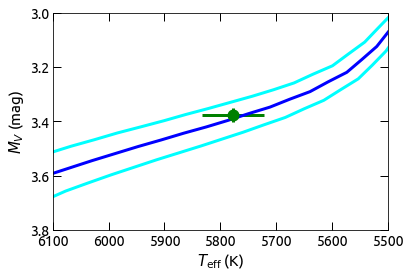

In [11]:
plt.plot(10**iso['logt'], iso['mv'], 'blue')
plt.plot(10**isop['logt'], isop['mv'], 'cyan')
plt.plot(10**isom['logt'], isom['mv'], 'cyan')
plt.xlim(6100, 5500)
plt.ylim(3.8, 3.0)
plt.errorbar(s.teff, s.M_V, s.err_M_V, s.err_teff, marker='o', color='green')
plt.xlabel('$T_\mathrm{eff}$ (K)')
plt.ylabel('$M_V$ (mag)')